# 01 · The One

**Observational record associated with the book**  
*Discovering Chaos in Prime Numbers — Computational Investigations through the Euler Mirror*  
© Alvaro Costa, 2025  

This notebook is part of a canonical sequence of computational records.  
It does not introduce new hypotheses, conjectures, or interpretative models.

Its sole purpose is to **record** the behaviour of arithmetic structures under an explicit,  
deterministic, and reproducible observational regime.

The complete conceptual discussion is contained in the book.  
This notebook documents only the corresponding experiment.

**Licence:** Creative Commons BY–NC–ND 4.0  
Reading, execution, and citation are permitted.  
Modification, adapted redistribution, or independent commercial use are not permitted.


---

## 1. The genesis of counting

The construction of the natural numbers can be described operationally as the repetition of the unit:

$$
\mathbb{N} = \{1, 2, 3, 4, \dots\}
$$

The element **1** is not merely the first element of this sequence, but the element that defines the step of counting. Counting is, essentially, the repetition of 1 at equal intervals.

From this simple operation, the entire landscape of discrete structures emerges. Among these structures, there is one that resists decomposition: the **prime numbers**. They are elements that do not admit non-trivial multiplicative decomposition when the unit is repeated and combined.

---

## 2. The fold

Consider the discrete interval $[1, x]$ and its partition at the point $\lfloor x/2 \rfloor$. This operation reveals a simple and fertile symmetry: primes naturally separate into two complementary roles.

* **Structuring primes** — primes in $[1, x/2]$: these act as basic building blocks. Being located in the first half, their multiples $2p, 3p, \cdots$ still lie within the observed interval $[1, x]$ and therefore **structure** the population of composite numbers.

* **Stabilising primes** — primes in $(x/2, x]$: more recent primes. Since $p > x/2$, they no longer generate new composites in $[1, x]$ (as $2p > x$). Their role is to **stabilise** the observed sequence by occupying positions not generated by composites.

These terms are used solely as descriptive labels and depend explicitly on the interval under consideration.

This duality motivates the definition of an arithmetic function that measures, at each value of $x$, the imbalance between the two groups of primes. The measurement consists of a direct comparison between the number of **stabilising primes** and **structuring primes**.

To express this mathematically, we first define the function $\pi(x)$, which simply counts the number of primes less than or equal to $x$.

With this, the arithmetic function, denoted by $\Delta_\pi(x)$, is defined as the difference:

$$
\Delta_\pi(x) =
\underbrace{\big(\pi(x) - \pi(\lfloor x/2 \rfloor)\big)}_{\text{Stabilising}}
-
\underbrace{\pi(\lfloor x/2 \rfloor)}_{\text{Structuring}}
$$

Simplifying the expression, we obtain its final and compact form:

$$
\Delta_\pi(x) = \pi(x) - 2 \cdot \pi\!\left(\left\lfloor \frac{x}{2} \right\rfloor\right)
$$

> **Operational observation**: partitioning the interval into $[1, x/2]$ and $(x/2, x]$ separates primes that still generate multiples within the interval from those that no longer generate new composites in $[1, x]$.

At this stage, this arithmetic function is only defined. No statistical or spectral analysis is performed here.

---

## 3. Visualisation: the two roles in action

We visualise the primes up to $N$, colouring:

* **blue** — primes in $[1, N/2]$ (*structuring*);
* **orange** — primes in $(N/2, N]$ (*stabilising*).

In the legend, we display $\pi(N/2)$ and $\pi(N) - \pi(N/2)$, respectively, in order to quantify each role.


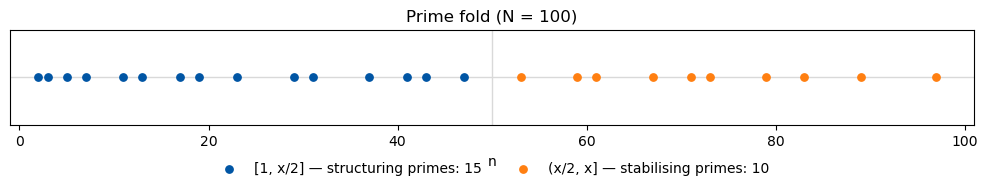

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Colours
BLUE   = "#0055A4"   # structuring primes in [1, x/2]
ORANGE = "#FF7F11"   # stabilising primes in (x/2, x]

def primes_up_to(n: int) -> np.ndarray:
    """Return all prime numbers less than or equal to n."""
    if n < 2:
        return np.array([], dtype=int)
    sieve = np.ones(n + 1, dtype=bool)
    sieve[:2] = False
    for i in range(2, int(np.sqrt(n)) + 1):
        if sieve[i]:
            sieve[i * i : n + 1 : i] = False
    return np.flatnonzero(sieve)

def plot_prime_fold_single_line(N: int = 100, size: int = 28):
    """
    Visualise primes up to N on a single number line,
    separated by the fold at N/2.
    """
    primes = primes_up_to(N)
    midpoint = N // 2

    left_primes  = primes[primes <= midpoint]  # structuring primes
    right_primes = primes[primes >  midpoint]  # stabilising primes

    fig, ax = plt.subplots(figsize=(10, 2.2))

    # single number line: y = 0
    y0 = np.zeros_like(primes)
    ax.scatter(
        left_primes,
        y0[:left_primes.size],
        s=size,
        color=BLUE,
        label=f'[1, x/2] — structuring primes: {left_primes.size}',
        zorder=3
    )
    ax.scatter(
        right_primes,
        y0[:right_primes.size],
        s=size,
        color=ORANGE,
        label=f'(x/2, x] — stabilising primes: {right_primes.size}',
        zorder=3
    )

    # visual guides
    ax.axhline(0, color="0.85", lw=1)
    ax.axvline(midpoint, color="0.85", lw=1)

    # aesthetics
    ax.set_yticks([])   # show only the number line
    ax.set_xlim(-1, N + 1)
    ax.set_xlabel("n")
    ax.set_title(f"Prime fold (N = {N})")
    ax.legend(
        loc="upper center",
        ncol=2,
        frameon=False,
        bbox_to_anchor=(0.5, -0.25)
    )

    plt.tight_layout()
    plt.show()

# Try it:
plot_prime_fold_single_line(100)


---

### **Experiment**

Change the value of $N$ to $200$, $400$, $800$. Observe how the points are distributed across the two halves. The observed partition preserves the same operational criterion, varying only with the scale of the interval.

An attentive reader will note an essential aspect: at each fold, part of the information from $[1, x/2]$ is reflected in $(x/2, x]$ through the structuring of composite numbers. The construction depends exclusively on the counting of primes within the interval considered.

**Note:** the value $1$ does not play an operational role in the relations observed. It supports the act of counting, but does not participate in the structural connections revealed by the fold.

In this model, the value $1$ acts solely as a unit of counting and does not participate in the multiplicative relations under consideration.

The partition of the interval becomes operational for values $x \geq 2$, when the division into halves is well defined.

The gaps introduced by the fold are measured in units of $1$, but only numbers greater than $1$ occupy structural positions.

---

## 4. Observation

Up to this point, there is no hypothesis, conjecture, or mysticism. We count, partition, and observe. The procedure involves only counting, partitioning of the interval, and empirical observation.

In the following chapters, we will construct the arithmetic function $\Delta_\pi(x)$ and examine how this discrete symmetry is transformed into **spectral structure**, where the statistical behaviour of the eigenvalues will be analysed within the regimes defined in the subsequent chapters, without invoking anything beyond the exact counting of primes.
